# Finding the Best Markets to Advertise In

In this project we are going to evaluate the best markets to spend on advertising programming courses, including web and mobile development, data science and game development. 

The goal is to identify the two best markets to advertise our product in. 

## Understanding the Data

We are going to use [freeCodeCamp's](https://www.freecodecamp.org/) [2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) which asks people who have been coding for less than 5 years to provide information about their learning goals, where they are on their career journey as a developer, how they have been learning, as well as their location and demographic information. 

The repository is located [here](https://github.com/freeCodeCamp/2017-new-coder-survey), and it's an ideal dataset to conduct our analysis.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
survey = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv')
print(survey.shape)
print(survey.head())

(18175, 136)
    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0               

C:\Users\George Boorman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Checking for Sample Representivity

We need to evaluate the survey population, to understand:
- Where these new coders are located
- What are the locations with the highest number of new coders
- How much money are new coders willing to spend on learning

In [2]:
#understanding the distribution of learning goals
pd.set_option('display.max_rows', None)
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                                                                                                                                       2.173913
Back-End Web Developer                                                                  

The above frequency distribution for the `JobRoleInterest` column shows us what learning goals the respondents have. We can observe:
- The most popular choices are `full-stack web developer`, `front-end web developer`, `data scientist` and `back-end web developer`
- A large proportion of those surveyed had multiple goals

Let's split out the data so we can determine the proportion of people with one learning goal versus multiple, and how many people are interested in either web or mobile development given these are our core courses available.

In [3]:
#first lets drop any null values
interests_no_nulls = survey['JobRoleInterest'].dropna()

#splitting the strings
split_interests = interests_no_nulls.str.split(',')

#frequency table by number of learning goals
num_options = split_interests.apply(lambda x: len(x))
num_options.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

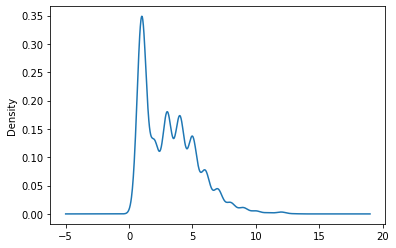

In [4]:
#Visualising this distribution
num_options.plot.kde()

The kernel density plot shows us that more than 30% of respondents only have one learning goal in mind. However, almost 50% of people are learning 2-5 subjects. 
Let's hone in on `web and mobile development`.

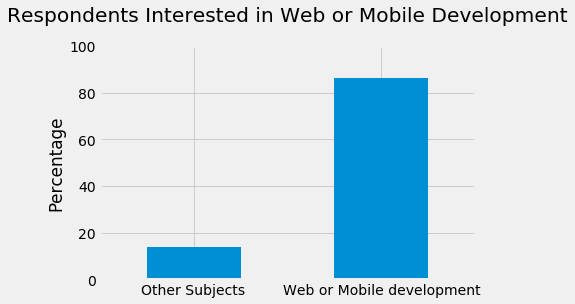

In [5]:
web_mob_dev = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
web_mob_freq = web_mob_dev.value_counts(normalize=True).sort_index()*100
web_mob_freq

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
web_mob_freq.plot.bar()
plt.title('Respondents Interested in Web or Mobile Development', y=1.08)
plt.ylabel('Percentage')
plt.xticks([0,1], ['Other Subjects', 'Web or Mobile development'], rotation=0)
plt.ylim([0,100])
plt.show()

We can see that more than 80% of survey responders are interested in web or mobile development. It's fair to conclude that this sample is representative of the audience we are looking to target, based on this. 

## Locations and Densities of New Learners

Now we know the survey data is fit-for-purpose, we can analyse the distribution of responders by country to segment different markets. 

In [6]:
#removing null values for interests from the dataframe
interests_given = survey[survey['JobRoleInterest'].notnull()].copy()

#frequency tables of country respondents live in, for absolute and relative frequencies
absolute = interests_given['CountryLive'].value_counts(ascending=False)
relative = interests_given['CountryLive'].value_counts(normalize=True,ascending=False)*100
pd.DataFrame(data = {'Absolute Frequency': absolute, 'Percentage': relative})

,Absolute Frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The most popular countries, or markets, are United States of America, India, United Kingdom and Canada. This is a good start to answer our question about where to advertise our courses, but from here we should also look to understand the proportion of learners per country who are willing to pay for online courses (and how much they will pay). 

## Spending Money for Learning

We will use the MoneyForLearning and MonthsProgramming columns to review the amount of money students have spent per month so far. We will also restrict our analysis to the four most popular countries as identified earlier, because a) they have the highest frequencies and b) our courses are written in English, which is an official language in all of these four countries.

In [7]:
interests_given['MonthsProgramming'].replace(0, 1, inplace=True)
interests_given['MoneyPerMonth'] = interests_given['MoneyForLearning'] / survey['MonthsProgramming']

interests_given = interests_given[interests_given['MoneyPerMonth'].notnull()]
interests_given = interests_given[interests_given['CountryLive'].notnull()]

mean_per_country = interests_given.groupby('CountryLive').mean()
mean_per_country = mean_per_country['MoneyPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]
print(interests_given['CountryLive'].value_counts().head())
print(mean_per_country)

United States of America    2827
India                        457
United Kingdom               271
Canada                       236
Poland                       118
Name: CountryLive, dtype: int64
CountryLive
United States of America    inf
India                       inf
United Kingdom              inf
Canada                      inf
Name: MoneyPerMonth, dtype: float64


Above we checked the sample size after filtering null values, then calculated the average spend per learner based on the country they reside in.
We can see, out of our four countries, the average spend is highest in the USA and lowest for the UK. This is interesting as USA, UK and Canada are all in the top 30 for [GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita), where as India is ranked 116th worldwide. 

We'll investigate the data further to understand whether we have some outliers, or other factors influencing these averages.

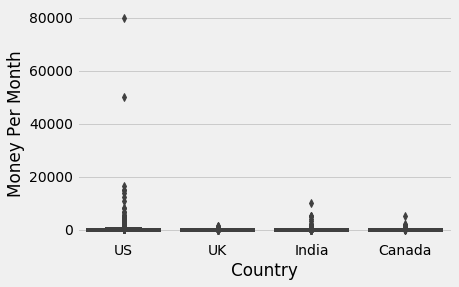

In [8]:
top_four = interests_given[interests_given['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')] 
import seaborn as sns
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_four)
plt.ylabel('Money Per Month')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [9]:
top_four['MoneyPerMonth'].describe()

count    3791.000000
mean             inf
std              NaN
min         0.000000
25%         0.000000
50%         2.777778
75%        41.666667
max              inf
Name: MoneyPerMonth, dtype: float64

It's quite hard to see the distribution, but there are a couple of significant outliers for the USA and India. We'll filter our dataset to exclude any students spending 10,000 or more. We'll also filter out any learners who have attended a bootcamp, as we deliver online courses with monthly subscriptions so they are less relevant.  

In [22]:
top_four_copy = top_four[(top_four['AttendedBootcamp'] == 0.0) & (top_four['MoneyPerMonth'] < 10000)]
top_four_copy.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or equivale

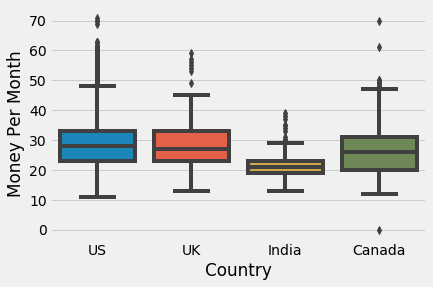

In [23]:
sns.boxplot(x='CountryLive', y='MoneyPerMonth', data=top_four_copy)
plt.ylabel('Money Per Month')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

## Choosing the Two Best Markets

In [35]:
top_four_absolute = top_four_copy['CountryLive'].value_counts()
top_four_relative = top_four_copy['CountryLive'].value_counts(normalize=True)*100
pd.DataFrame(data = {'Absolute Frequency': top_four_absolute, 'Percentage': top_four_relative})

,Absolute Frequency,Percentage
United States of America,2534,73.215834
India,441,12.741982
United Kingdom,261,7.541173
Canada,225,6.501011


Having removed outliers, we can understand the data more clearly. The US appears to be the best market to advertise in, based on average spend per new learner. 

Both the UK and Canada have similar average spend, with Canada having some higher outliers but the upper boundary (75\%) for the UK being slightly higher in terms of average spend (75% looks to be about \\$33 vs Canada's \\$31). 

We need to consider that our subscription cost is \\$59 per month, which is more expensive than most people in the other three markets are currently paying. 

It is also worth highlighting that we are left with quite small samples for these markets (225-441 people), which raises questions as to whether a) whether the samples are representative of what people would pay for our product, and b) if we take the relatvie frequencies of these markets in the survey data is this an indication that there aren't as many people interested in coding in these countries? 

With these questions in mind, for now it is best to only advertise in the US and concurrently to undertake our own market research to evaluate other markets. 